# Custom Kernel GPR: Extention to Time Evolution



## Extension to 2D Heat Equation

### We now consider the 2D heat equation $T_t = \alpha (T_{xx} + T_{yy})$ on a square domain $[0,L] \times [0,L]$ with zero Dirichlet boundary conditions: $T(t,x,0)=T(t,x,L)=T(t,0,y)=T(t,L,y)=0$.

### The analytical solution is found using separation of variables:
$$
T(t,x,y) = \sum_{n=1}^{\infty} \sum_{m=1}^{\infty} B_{nm} \exp \left( -\alpha \lambda_{nm} t \right) \sin\left( \frac{n\pi x}{L} \right) \sin\left( \frac{m\pi y}{L} \right)
$$
### where the eigenvalues are $\lambda_{nm} = \left(\frac{\pi}{L}\right)^2 (n^2 + m^2)$.

### Our goal is to predict the temperature field $T(t,x,y)$ using sparse measurements at different space-time coordinates $(t_i, x_i, y_i)$.

### Let the input vector be $\mathbf{X} = (t, x, y)$. The function we are modeling is $f(\mathbf{X}) = T(t,x,y)$. We represent the function using its basis expansion:
$$
f(\mathbf{X}) = \sum_{n=1}^{N} \sum_{m=1}^{M} B_{nm} \phi_{nm}(\mathbf{X})
$$
### where $N, M$ are truncation limits for the series (often chosen such that $N=M$), and the basis functions are:
$$
\phi_{nm}(\mathbf{X}) = \phi_{nm}(t,x,y) = \exp \left( -\alpha \left(\frac{\pi}{L}\right)^2 (n^2 + m^2) t \right) \sin\left( \frac{n\pi x}{L} \right) \sin\left( \frac{m\pi y}{L} \right)
$$

### We place a prior on the coefficients $B_{nm}$. Following the 1D case logic, we assume the coefficients are uncorrelated a priori with uniform variance. Let the prior covariance be:
$$
\langle B_{nm} B_{n'm'} \rangle = A^{-1}_{(nm),(n'm')} = Z_{nm} \delta_{nn'} \delta_{mm'}
$$
### Similar to the final step in the 1D derivation, we set the prior variance $Z_{nm} = 1$ for all $n, m$. This implies that our prior belief assumes equal contribution potential from all modes before seeing data, and the structure (decay rates, spatial oscillations) is encoded entirely within the basis functions $\phi_{nm}$.

### Now we compute the kernel function $K(\mathbf{X}, \mathbf{X}')$, where $\mathbf{X}=(t, x, y)$ and $\mathbf{X}'=(t', x', y')$. The kernel represents the expected covariance between function values at these two points under the prior:
$$
\begin{align*}
K(\mathbf{X}, \mathbf{X}') &= \langle f(\mathbf{X}) f(\mathbf{X}') \rangle \\
&= \left\langle \left( \sum_{n=1}^{N} \sum_{m=1}^{M} B_{nm} \phi_{nm}(\mathbf{X}) \right) \left( \sum_{n'=1}^{N} \sum_{m'=1}^{M} B_{n'm'} \phi_{n'm'}(\mathbf{X}') \right) \right\rangle \\
&= \sum_{n=1}^{N} \sum_{m=1}^{M} \sum_{n'=1}^{N} \sum_{m'=1}^{M} \langle B_{nm} B_{n'm'} \rangle \phi_{nm}(\mathbf{X}) \phi_{n'm'}(\mathbf{X}') \\
&= \sum_{n=1}^{N} \sum_{m=1}^{M} \sum_{n'=1}^{N} \sum_{m'=1}^{M} (1 \cdot \delta_{nn'} \delta_{mm'}) \phi_{nm}(\mathbf{X}) \phi_{n'm'}(\mathbf{X}') \\
&= \sum_{n=1}^{N} \sum_{m=1}^{M} \phi_{nm}(\mathbf{X}) \phi_{nm}(\mathbf{X}')
\end{align*}
$$
### Substituting the expression for $\phi_{nm}(\mathbf{X})$:
$$
\begin{align*}
K(\mathbf{X}, \mathbf{X}') &= \sum_{n=1}^{N} \sum_{m=1}^{M} \left[ \exp \left( -\alpha \lambda_{nm} t \right) \sin\left( \frac{n\pi x}{L} \right) \sin\left( \frac{m\pi y}{L} \right) \right] \\
&\quad \times \left[ \exp \left( -\alpha \lambda_{nm} t' \right) \sin\left( \frac{n\pi x'}{L} \right) \sin\left( \frac{m\pi y'}{L} \right) \right] \\
&= \sum_{n=1}^{N} \sum_{m=1}^{M} \exp \left( -\alpha \lambda_{nm} (t+t') \right) \sin\left( \frac{n\pi x}{L} \right) \sin\left( \frac{m\pi y}{L} \right) \sin\left( \frac{n\pi x'}{L} \right) \sin\left( \frac{m\pi y'}{L} \right)
\end{align*}
$$
### Substituting $\lambda_{nm} = \left(\frac{\pi}{L}\right)^2 (n^2 + m^2)$, the final kernel is:
$$
K(\mathbf{X}, \mathbf{X}') = \sum_{n=1}^{N} \sum_{m=1}^{M} \exp \left( -\alpha \left(\frac{\pi}{L}\right)^2 (n^2 + m^2) (t+t') \right) \sin\left( \frac{n\pi x}{L} \right) \sin\left( \frac{m\pi y}{L} \right) \sin\left( \frac{n\pi x'}{L} \right) \sin\left( \frac{m\pi y'}{L} \right)
$$
### where $\mathbf{X}=(t, x, y)$ and $\mathbf{X}'=(t', x', y')$.

# Gaussian Process Regression

### Given a dataset of $P$ measurements $\{ (\mathbf{X}_i, T_i, \sigma_i^2) \}_{i=1}^P$, where $\mathbf{X}_i = (t_i, x_i, y_i)$, $T_i = T(t_i, x_i, y_i)$ is the measured temperature, and $\sigma_i^2$ is the measurement noise variance at point $i$. We assume independent noise for each measurement.

### The kernel matrix $\bar{\mathbf{K}}$ for the observed data points is constructed as:
$$
[\bar{\mathbf{K}}]_{ij} = K(\mathbf{X}_i, \mathbf{X}_j) + \sigma_i^2 \delta_{ij}
$$
### Note: If we assume a uniform noise variance $\sigma^2$ for all measurements, the matrix becomes $\bar{\mathbf{K}} = \mathbf{K} + \sigma^2 \mathbf{I}$, where $[\mathbf{K}]_{ij} = K(\mathbf{X}_i, \mathbf{X}_j)$ and $\mathbf{I}$ is the identity matrix.

### The posterior expectation (prediction) of the temperature at a new point $\mathbf{X}_* = (t_*, x_*, y_*)$ is given by:
$$
\langle T(\mathbf{X}_*) \rangle = \mathbf{k}_*^T \bar{\mathbf{K}}^{-1} \mathbf{T}
$$
### where:
-   $\mathbf{T} = [T_1, T_2, ..., T_P]^T$ is the vector of observed temperatures.
-   $\mathbf{k}_*$ is the vector of covariances between the test point $\mathbf{X}_*$ and the training points $\mathbf{X}_i$:
    $$
    [\mathbf{k}_*]_i = K(\mathbf{X}_*, \mathbf{X}_i)
    $$

### Explicitly written using summation notation:
$$
\langle T(\mathbf{X}_*) \rangle = \sum_{i=1}^{P} \sum_{j=1}^{P} K(\mathbf{X}_*, \mathbf{X}_i) [\bar{\mathbf{K}}^{-1}]_{ij} T_j
$$
### This framework allows predicting the full spatial-temporal temperature field $T(t,x,y)$ based on sparse measurements by leveraging the known analytical structure of the heat equation solution embedded within the custom kernel.

### We begin by calcualting the prior covariance:

In [1]:
import numpy as np

def prior_covar(N_modes: float):
    ''' 
    Calculates the covariance matrix:
        A_{ss'} =delta_{s,s'}
    '''
    n: float = N_modes

    return np.eye(n,n)

N = 2
print(prior_covar(N))


[[1. 0.]
 [0. 1.]]


### then use the prior-covariance matrix to construct the kernel function:
$$
K(\mathbf{X}, \mathbf{X}') = \sum_{n=1}^{N} \sum_{m=1}^{M} \exp \left( -\alpha \left(\frac{\pi}{L}\right)^2 (n^2 + m^2) (t+t') \right) \sin\left( \frac{n\pi x}{L} \right) \sin\left( \frac{m\pi y}{L} \right) \sin\left( \frac{n\pi x'}{L} \right) \sin\left( \frac{m\pi y'}{L} \right)
$$
### where $\mathbf{X}=(t, x, y)$ and $\mathbf{X}'=(t', x', y')$.

## Kernel Function:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(1) #
 
def kernel_func_2d(Length: float,
                   alpha: float,
                   modes: int,  
                   coord1: list,
                   coord2: list) -> float:
    """
    Computes the space-time kernel value K(X, X') for the 2D heat
    equation on a square domain [0,L]x[0,L], where X=(t,x,y) and X'=(t',x',y').
    Assumes an identity prior covariance on initial coefficients (Z_nm=1).

    The kernel formula is:
    K(X, X') = sum_{n=1}^{N} sum_{m=1}^{M} exp(-alpha*(pi/L)^2*(n^2+m^2)*(t+t')) *
               sin(n*pi*x/L) * sin(m*pi*y/L) * sin(n*pi*x'/L) * sin(m*pi*y'/L)
 
    convention: The first coordinate [t, x, y].
    """
    L: float = Length
    N: int = modes # Number of modes for x-dimension
    M: int = modes # Number of modes for y-dimension

    # Unpack coordinates
    t1, x1, y1 = coord1[0], coord1[1], coord1[2]
    t2, x2, y2 = coord2[0], coord2[1], coord2[2]

    # Ensure coordinates are within the domain [0, L] (optional, but good practice)
    # Add checks here if needed, e.g., assert 0 <= x1 <= L, etc.

    # Generate mode numbers (1 to N and 1 to M)
    n_vals = np.arange(1, N + 1)
    m_vals = np.arange(1, M + 1)

    # Precompute constants and common terms
    pi_L = np.pi / L
    const = alpha * (pi_L**2)
    t_sum = t1 + t2

    # Use meshgrid to create all (n, m) pairs efficiently
    nn, mm = np.meshgrid(n_vals, m_vals, indexing='ij') # nn varies along axis 0 (rows), mm along axis 1 (cols)

    # Calculate n^2 + m^2 for all pairs (shape: N x M)
    n_sq_plus_m_sq = nn**2 + mm**2

    # Calculate the exponential decay term (shape: N x M)
    exp_decay = np.exp(-const * n_sq_plus_m_sq * t_sum)

    # Calculate sine terms (shape: N x M)
    # Note: Need careful use of nn and mm indices corresponding to n and m
    sin_nx1 = np.sin(nn * pi_L * x1)
    sin_my1 = np.sin(mm * pi_L * y1)
    sin_nx2 = np.sin(nn * pi_L * x2)
    sin_my2 = np.sin(mm * pi_L * y2)

    # Combine all terms inside the sum (element-wise product, shape: N x M)
    term_nm = exp_decay * sin_nx1 * sin_my1 * sin_nx2 * sin_my2

    # Sum over all n and m modes
    kernel_value = np.sum(term_nm)

    return kernel_value

def kernel_matrix_2d(Length: float,
                     alpha: float,
                     modes: int, # Assume N=M=modes
                     coord1: list[np.ndarray], # [t1_array, x1_array, y1_array]
                     coord2: list[np.ndarray]  # [t2_array, x2_array, y2_array]
                     ) -> np.ndarray:
    """
    Computes the space-time kernel matrix K(X_i, X'_j) for the 2D heat
    equation on a square domain [0,L]x[0,L], where X=(t,x,y) and X'=(t',x',y').
    Assumes an identity prior covariance on initial coefficients (Z_nm=1).

    The kernel formula is:
    K(X, X') = sum_{n=1}^{N} sum_{m=1}^{M} exp(-alpha*(pi/L)^2*(n^2+m^2)*(t+t')) *
               sin(n*pi*x/L) * sin(m*pi*y/L) * sin(n*pi*x'/L) * sin(m*pi*y'/L)
    """
    L: float = Length
    a: float = alpha
    N_modes: int = modes # Number of modes for x-dimension (n)
    M_modes: int = modes # Number of modes for y-dimension (m)
    t1_array, x1_array, y1_array = coord1[0], coord1[1], coord1[2]
    t2_array, x2_array, y2_array = coord2[0], coord2[1], coord2[2]

    # --- Precompute mode-related terms ---
    pi_L = np.pi / L
    n_vals = np.arange(1, N_modes + 1) # Modes n=1..N
    m_vals = np.arange(1, M_modes + 1) # Modes m=1..M

    # n^2 + m^2 for all pairs (n, m) -> Shape: (N_modes, M_modes)
    n_sq = n_vals**2
    m_sq = m_vals**2 
    n_sq_plus_m_sq = n_sq[:, None] + m_sq[None, :]   
    exponent_const = -a * (pi_L**2) * n_sq_plus_m_sq

    # --- Calculate time-dependent exponential decay --- 
    t_sum = t1_array[:, None] + t2_array[None, :] 
    exp_decay = np.exp(exponent_const[:, :, None, None] * t_sum[None, None, :, :]) 
    sin_nx1 = np.sin(n_vals[:, None] * pi_L * x1_array[None, :]) # (N_modes, P1)
    sin_my1 = np.sin(m_vals[:, None] * pi_L * y1_array[None, :]) # (M_modes, P1)
    sin_nx2 = np.sin(n_vals[:, None] * pi_L * x2_array[None, :]) # (N_modes, P2)
    sin_my2 = np.sin(m_vals[:, None] * pi_L * y2_array[None, :]) # (M_modes, P2)

    # --- Combine terms and sum over modes n and m ---  
    term_prod = (exp_decay *
                 sin_nx1[:, None, :, None] *
                 sin_my1[None, :, :, None] *
                 sin_nx2[:, None, None, :] *
                 sin_my2[None, :, None, :])   
    kernel_mat = np.sum(term_prod, axis=(0, 1)) # Shape: (P1, P2)

    return kernel_mat

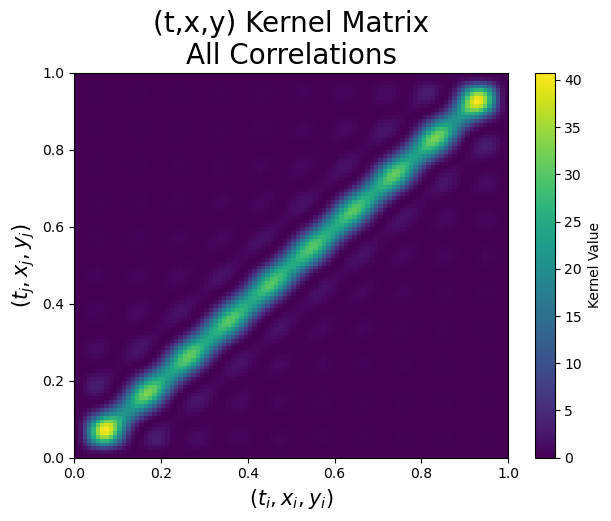

In [3]:
# Example parameters
L = 1.0
a = 0.01
modes = 10
steps = 100
tmax = 0
t_data = np.linspace(0, tmax, steps)  # 100 time points
x_data = np.linspace(0, L, steps)  # 100 spatial points
y_data = np.linspace(0, L, steps)  # 100 spatial points

# Compute the kernel matrix
K_matrix_2d = kernel_matrix_2d(L, a, modes, [t_data, x_data, y_data], [t_data, x_data, y_data])

# Plot the kernel matrix
plt.figure(figsize=(7, 5))
plt.imshow(K_matrix_2d, extent=(0, 1, 0, 1), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Kernel Value")
plt.title("(t,x,y) Kernel Matrix\nAll Correlations",size=20)
plt.xlabel(r"$(t_i,x_i,y_i)$",size=15)
plt.ylabel(r"$(t_j,x_j,y_j)$",size=15)
plt.show()

## Data Covariance matrix: 

In [4]:
import numpy as np

def data_covar(Length: float,
               alpha: float,
               modes: int,
               meas_point1: list[np.ndarray,np.ndarray,np.ndarray],
               meas_point2: list[np.ndarray,np.ndarray,np.ndarray],
               sigma: float,
               kernel_matrix: callable):
    ''' 
    Computes the data covariance matrix:\n
        Kbar[a,b] = K((t_a,x_a,y_a),(t_b,x_b,y_b)) + sigma^2 * 1
    '''
    L: float = Length
    a: float = alpha
    N: int = modes
    kernel: np.ndarray = kernel_matrix(L, a, N, meas_point1, meas_point2)
    covariance: np.ndarray = kernel + sigma**2 * np.eye(kernel.shape[0])
    return covariance


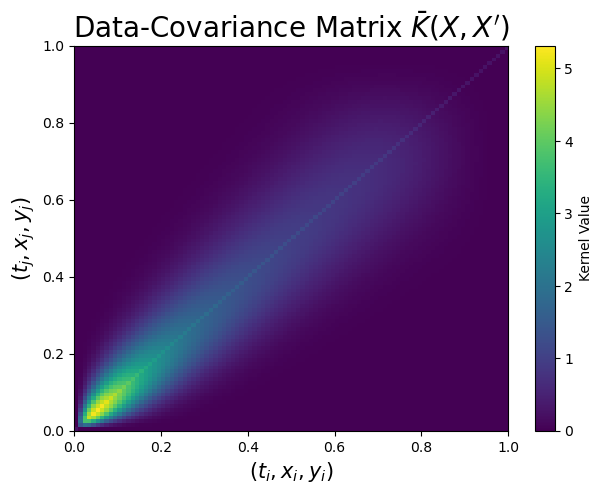

In [5]:
# Example parameters
L = 1.0
a = 0.01
modes = 20
tmax = 2
sigma = 0.5
steps = 100
t_data = np.linspace(0, tmax, steps)  # 100 time points
x_data = np.linspace(0, L, steps)  # 100 spatial points
y_data = np.linspace(0, L, steps)  # 100 spatial points

Kbar = data_covar(L, a, modes, [t_data, x_data, y_data], [t_data, x_data, y_data],sigma, kernel_matrix_2d)
# Plot the kernel matrix
plt.figure(figsize=(7, 5))
plt.imshow(Kbar, extent=(0, 1, 0, 1), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Kernel Value")
plt.title(r"Data-Covariance Matrix $\bar{K}(X,X')$",size=20)
plt.xlabel(r"$(t_i,x_i,y_i)$",size=15)
plt.ylabel(r"$(t_j,x_j,y_j)$",size=15)
plt.show()

### The posterior expectation (prediction) of the temperature at a new point $\mathbf{X}_* = (t_*, x_*, y_*)$ is given by:
$$
\langle T(\mathbf{X}_*) \rangle = \mathbf{k}_*^T \bar{\mathbf{K}}^{-1} \mathbf{T}
$$
### where:
- ###   $\mathbf{T} = [T_1, T_2, ..., T_P]^T$ is the vector of observed temperatures.
- ###   $\mathbf{k}_*$ is the vector of covariances between the test point $\mathbf{X}_*$ and the training points $\mathbf{X}_i$:
    $$
    [\mathbf{k}_*]_i = K(\mathbf{X}_*, \mathbf{X}_i)
    $$

### Explicitly written using summation notation:
$$
\langle T(\mathbf{X}_*) \rangle = \sum_{i=1}^{P} \sum_{j=1}^{P} K(\mathbf{X}_*, \mathbf{X}_i) [\bar{\mathbf{K}}^{-1}]_{ij} T_j
$$
### This framework allows predicting the full spatial-temporal temperature field $T(t,x,y)$ based on sparse measurements by leveraging the known analytical structure of the heat equation solution embedded within the custom kernel.

## surface temperature plot

In [6]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(1) 
from scipy import linalg

def measure_T(diffuse: float,
              time: float,
              x_list: list, 
              xp_list: list, 
              Length_x: float,
              coeffs_x: np.ndarray,
              coeffs_y: np.ndarray) -> np.ndarray:
    """
    measures temperatures T(x, y) at specified points,
    where x = x_list[k] and y = xp_list[k] for each index k.
    """
    # Ensure inputs are numpy arrays
    x_pts = np.asarray(x_list)
    y_pts = np.asarray(xp_list) # y coordinates come from xp_list

    Lx = Length_x
    Ly = Length_x 
    c_n = coeffs_x
    c_m = coeffs_y
    N = len(c_n) 

    modes = np.arange(1, N + 1) 
    kx = modes * np.pi / Lx
    ky = modes * np.pi / Ly

    # Calculate the separate exponential decay factors for each mode direction
    exp_decay_n = np.exp(-diffuse * time * kx**2) 
    exp_decay_m = np.exp(-diffuse * time * ky**2) 
    coeffs_combined = np.outer(c_n * exp_decay_n, c_m * exp_decay_m) # Shape (N, N)

    sin_nx_pts = np.sin(np.outer(x_pts, kx))
    sin_my_pts = np.sin(np.outer(y_pts, ky)) 
    temperature_at_points = np.einsum('nm,kn,km->k',
                                       coeffs_combined,
                                       sin_nx_pts,
                                       sin_my_pts,
                                       optimize='optimal')

    return temperature_at_points

def plot_temperature_grid(ax, data_grid, x1_measure, x2_measure, measured_temps, extent, cmap, label, title, clim=None, scatter_color='viridis', scatter_edge='k', scatter_size=50):
    """
    Plots a temperature distribution on a given axis with associated scatter data.
    """
    im = ax.imshow(data_grid, extent=extent, origin='lower', cmap=cmap, aspect='auto', vmin=clim[0] if clim else None, vmax=clim[1] if clim else None)
    ax.scatter(x1_measure, x2_measure, c=measured_temps, cmap=scatter_color, edgecolor=scatter_edge, s=scatter_size, label='Measurements')
    ax.set_title(title, size=15)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    cbar = plt.colorbar(im, ax=ax, label=label, fraction=0.046, pad=0.04)
    ax.legend()
    return im

def temp_distr_2d(diffuse: float,time: float,
                  Length_x: float, x_array: np.ndarray,
                  coeffs_x: np.ndarray, coeffs_y: np.ndarray) -> np.ndarray:
    ''' 
    Calculates the 2d temperature distribution on a plane
    '''
    Lx = Length_x
    Ly = Length_x
    y_array = x_array
    c_n = coeffs_x
    c_m = coeffs_y

    return sum(
        c_n[n] * c_m[m]
        * np.exp(-diffuse * time * (((n + 1) * np.pi / Lx) ** 2 + ((m + 1) * np.pi / Ly) ** 2))
        * np.sin((n + 1) * np.pi * x_array / Lx)[:, None]
        * np.sin((m + 1) * np.pi * y_array / Ly)[None, :]
        for n in range(len(c_n))
        for m in range(len(c_m))
    )

def temp_evolution_at_point(diffuse: float, time_array: np.ndarray,
                            Length_x: float, x_coord: float, y_coord: float,
                            coeffs_x: np.ndarray, coeffs_y: np.ndarray) -> np.ndarray:
    """
    Calculates the 2D temperature evolution at a specific point (x, y)
    over an array of time points using a vectorized approach.
    """
    Lx = Ly = Length_x # Assume square domain
    c_n = np.atleast_1d(np.asarray(coeffs_x))
    c_m = np.atleast_1d(np.asarray(coeffs_y))
    times = np.asarray(time_array)

    if times.ndim != 1: raise ValueError("time_array must be 1D.")

    num_n, num_m = len(c_n), len(c_m)
    n_vals = np.arange(1, num_n + 1)
    m_vals = np.arange(1, num_m + 1)

    # Pre-calculate spatial and decay terms
    sin_x_terms = np.sin(n_vals * np.pi * x_coord / Lx)
    sin_y_terms = np.sin(m_vals * np.pi * y_coord / Ly)
    spatial_part = np.outer(c_n * sin_x_terms, c_m * sin_y_terms)

    decay_exponents_n = (n_vals * np.pi / Lx) ** 2
    decay_exponents_m = (m_vals * np.pi / Ly) ** 2
    total_decay_rates = decay_exponents_n[:, None] + decay_exponents_m[None, :]

    # Calculate evolution using broadcasting
    exp_decay = np.exp(-diffuse * times[:, None, None] * total_decay_rates[None, :, :])
    all_terms = spatial_part[None, :, :] * exp_decay
    temperature_evolution = np.sum(all_terms, axis=(1, 2))

    return temperature_evolution



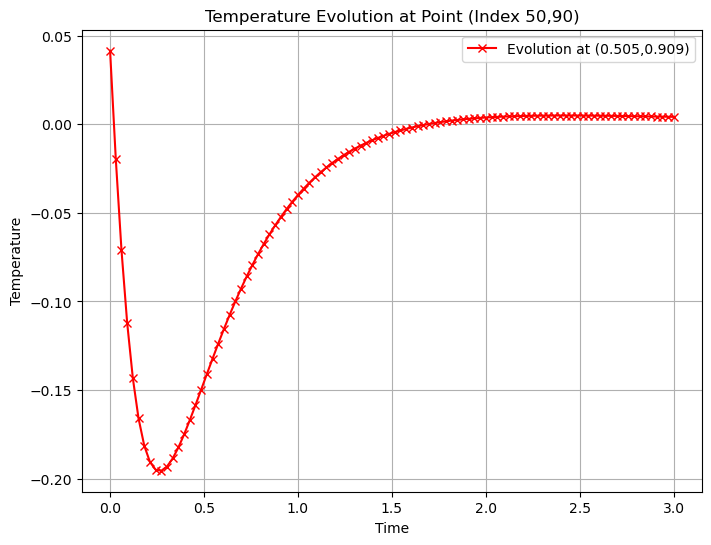

Temperature at t=3.00 for point (0.505, 0.909) is: 0.004153


In [7]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(1)

# --- Parameters ---
L = 1.0
alpha = 0.01
modes = 10
spatial_res = 100
time_res = 100

# Generate random Fourier coefficients
c_n, c_m = rng.uniform(-1, 1, modes), rng.uniform(-1, 1, modes)

# --- Define Grid Point to Track (using indices) ---
x_plot = np.linspace(0, L, spatial_res)
y_plot = np.linspace(0, L, spatial_res)
x_idx = 50
y_idx = 90
x_coord = x_plot[x_idx]
y_coord = y_plot[y_idx]

# --- Time array ---
times_to_eval = np.linspace(0, 3.0, time_res)

# --- Calculate Temperature Evolution at the Point ---
temps_over_time = temp_evolution_at_point(
    alpha, times_to_eval, L, x_coord, y_coord, c_n, c_m
)

# --- Plotting ---
plt.figure(figsize=(8, 6))
plt.plot(times_to_eval, temps_over_time, 'r-x', label=f'Evolution at ({x_coord:.3f},{y_coord:.3f})')
plt.xlabel("Time")
plt.ylabel(f"Temperature")
plt.title(f"Temperature Evolution at Point (Index {x_idx},{y_idx})")
plt.legend()
plt.grid(True)
plt.show()

print(f"Temperature at t={times_to_eval[-1]:.2f} for point ({x_coord:.3f}, {y_coord:.3f}) is: {temps_over_time[-1]:.6f}")

In [9]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(1) 
from scipy import linalg

def mean_prediction_2d(Length: float,
                       alpha: float,
                       modes: int,
                       prediction_coords: list[np.ndarray], # [t_pred, x_pred, y_pred]
                       measurement_coords: list[np.ndarray], # [t_meas, x_meas, y_meas]
                       Kbar: np.ndarray,
                       meas_temps: np.ndarray,
                       kernel_matrix_2d_func: callable 
                       ) -> np.ndarray:
    """
    Calculates the mean posterior prediction for the 2D heat equation at prediction_coords.
        <T(X_*)> = K(X_*, X_meas) @ Kbar^{-1} @ T_meas
    where:
        X_* are the prediction points (t_*, x_*, y_*)
        X_meas are the measurement points (t_i, x_i, y_i)
        T_meas are the measured temperatures T(X_meas)
        Kbar is the data covariance matrix K(X_meas, X_meas) + noise*I
 
    """
    L: float = Length
    a: float = alpha
    N: int = modes

    # 1. Calculate weights: Kbar^{-1} @ T_meas
    Kbar_inv = np.linalg.inv(Kbar)
    weights = Kbar_inv @ meas_temps
    
    # 2. Calculate K_star matrix: K(X_pred, X_meas)
    # This matrix has dimensions (P_pred, P_meas)
    K_star_matrix = kernel_matrix_2d_func(L, a, N, prediction_coords, measurement_coords)

    # 3. Calculate mean predictions: K_star @ weights
    # Resulting shape: (P_pred, P_meas) @ (P_meas,) -> (P_pred,)
    predictions = K_star_matrix @ weights

    return predictions


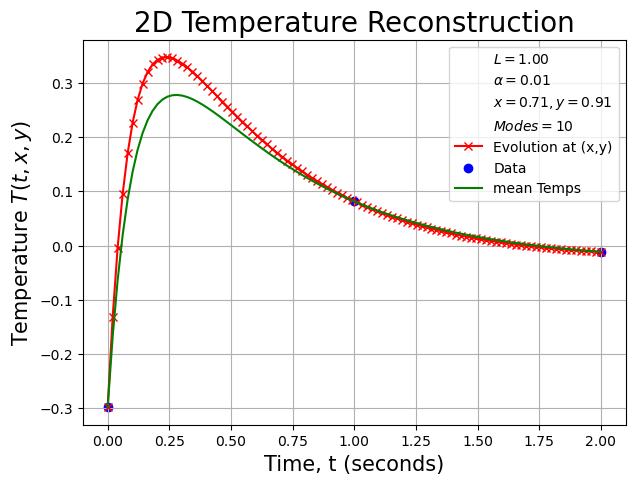

Temperature at t=2.00 for point (0.707, 0.909) is: -0.012006


In [23]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(1)

# --- Parameters ---
L = 1.0
alpha = 0.01
modes = 10
sigma = 0.01
tmax = 2
spatial_res = 100
num_pred_times = 100
num_meas = 3              

# Generate random Fourier coefficients
c_n, c_m = rng.uniform(-1, 1, modes), rng.uniform(-1, 1, modes)

# --- Define Grid Point to Track (using indices) ---
# measurements coordinates
x_plot = np.linspace(0, L, spatial_res)
y_plot = np.linspace(0, L, spatial_res)
x_idx = 70
y_idx = 90
x_coord = x_plot[x_idx]
y_coord = y_plot[y_idx]
x_meas = np.ones(num_meas) * x_coord
y_meas = np.ones(num_meas) * y_coord  
t_meas = np.linspace(0, tmax, num_meas)   
measurement_coords = [t_meas, x_meas, y_meas]

# prediction points
time_vals_pred = np.linspace(0, tmax, num_pred_times)
x_pred =  np.ones(num_pred_times) * x_coord
y_pred =  np.ones(num_pred_times) * y_coord
predictions_list = [time_vals_pred, x_pred, y_pred]

# Calculate true temperatures at the prediction points 
temps_over_time = temp_evolution_at_point(
    alpha, time_vals_pred, L, x_coord, y_coord, c_n, c_m
)

# calculate the measurements:
measured_temps = temp_evolution_at_point(
    alpha, t_meas, L, x_coord, y_coord, c_n, c_m
)

# precompute data-covariance:
Kbar = data_covar(L, alpha, modes, 
                  measurement_coords,
                  measurement_coords,
                  sigma, kernel_matrix_2d)

ave_temps = mean_prediction_2d(L, alpha, modes,
                               predictions_list, 
                               measurement_coords,
                               Kbar, measured_temps,
                               kernel_matrix_2d)

# --- Plotting ---
plt.figure(figsize=(7, 5))
plt.plot([],[],color='none',label=rf"$L={L:.2f}$")
plt.plot([],[],color='none',label=rf"$\alpha={alpha:.2f}$")
plt.plot([],[],color='none',label=rf"$x={x_coord:.2f}, y={y_coord:.2f}$")
plt.plot([],[],color='none',label=rf"$Modes={modes}$")
plt.plot(time_vals_pred, temps_over_time, 'r-x', label=f'Evolution at (x,y)')
plt.scatter(t_meas,measured_temps, color='b', label='Data')
plt.plot(time_vals_pred, ave_temps,color='g', label=f'mean Temps')
plt.xlabel("Time, t (seconds)",size=15)
plt.ylabel(r"Temperature $T(t,x,y)$", size=15)
plt.title(f"2D Temperature Reconstruction",size=20)
plt.legend()
plt.grid(True)
plt.show()

print(f"Temperature at t={time_vals_pred[-1]:.2f} for point ({x_coord:.3f}, {y_coord:.3f}) is: {temps_over_time[-1]:.6f}")

## Posterior Variance (2D Case):

### The posterior variance measures the uncertainty in our prediction at a new point $\mathbf{X} = (t, x, y)$ after observing the data $\{ (\mathbf{X}_i, T_i, \sigma_i^2) \}_{i=1}^P$. It is calculated as the prior variance at the point $\mathbf{X}$ minus the reduction in variance due to the information gained from the measurements.

### The formula for the posterior variance is:
$$
\sigma_{\text{post}}^2(\mathbf{X}) = K(\mathbf{X}, \mathbf{X}) - \mathbf{k}_{\mathbf{X}}^T \bar{\mathbf{K}}^{-1} \mathbf{k}_{\mathbf{X}}
$$
### where:
- ##### $\mathbf{X} = (t, x, y)$ is the coordinate where we want to predict the variance.
- ##### $K(\mathbf{X}, \mathbf{X})$ is the prior variance at $\mathbf{X}$  
- ##### $\mathbf{k}_{\mathbf{X}}$ is the vector of prior covariances between the prediction point $\mathbf{X}$ and the measurement points $\mathbf{X}_i = (t_i, x_i, y_i)$:
  $$
  [\mathbf{k}_{\mathbf{X}}]_i = K(\mathbf{X}, \mathbf{X}_i) = K((t, x, y), (t_i, x_i, y_i))
  $$
- ##### $\bar{\mathbf{K}}$ is the kernel matrix of the measurement points, including noise:
  $$
  [\bar{\mathbf{K}}]_{ij} = K(\mathbf{X}_i, \mathbf{X}_j) + \sigma_i^2 \delta_{ij}
  $$

### Expanding the vector notation into summation form:
$$
\sigma_{\text{post}}^2((t,x,y)) = K((t, x, y), (t, x, y)) - \sum_{i,j} K((t, x, y), (t_i, x_i, y_i)) [\bar{\mathbf{K}}^{-1}]_{ij} K((t_j, x_j, y_j), (t, x, y))
$$

### This formula quantifies the uncertainty of the prediction $\langle T(\mathbf{X}) \rangle$ at the point $\mathbf{X}=(t,x,y)$. The uncertainty is lowest near the measurement points $\mathbf{X}_i$ and higher further away in the $(t,x,y)$ space.

In [13]:
import numpy as np 

# Assume the following functions are defined elsewhere as provided in the prompt:
# def kernel_func_2d(...) -> float: ...
# def kernel_matrix_2d(...) -> np.ndarray: ...
# def data_covar(...) -> np.ndarray: ...

def GPR_prediction_2d(Length: float,
                      alpha: float,
                      modes: int,
                      prediction_coords: list[np.ndarray,np.ndarray,np.ndarray],
                      measurement_coords: list[np.ndarray], # [t_meas, x_meas, y_meas]
                      meas_temps: np.ndarray,
                      sigma: float, # Noise sigma is needed for Kbar 
                      kernel_matrix_2d_func: callable # Function K(X_vec, X'_vec) for vectors
                      ) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Calculates the GP posterior mean and variance at multiple prediction points
    for the 2D heat equation.
    """
    L = Length
    a = alpha
    N = modes # Assume N=M=modes

    # Calculate data covariance matrix Kbar = K(X_meas, X_meas) + sigma^2 * I 
    Kbar = data_covar(L, a, N, measurement_coords, measurement_coords, sigma, kernel_matrix_2d_func)

    # Calculate inverse of Kbar
    Kbar_inv = np.linalg.inv(Kbar)
 
    # Calculate weights for mean prediction: alpha_weights = Kbar^{-1} * T_meas
    weights = Kbar_inv @ meas_temps

    # Mean Calculation 
    K_star_matrix = kernel_matrix_2d_func(L, a, N, prediction_coords, measurement_coords)

    # Calculate mean predictions: <T_*> = K_star @ weights 
    mean_pred = K_star_matrix @ weights

    # Variance Calculation 
    # 1. Calculate prior variance K(X_*, X_*) for each prediction point 
    K_pred_pred = kernel_matrix_2d_func(L, a, N, prediction_coords, prediction_coords)
    k_diag = np.diag(K_pred_pred)

    # 2. Calculate the variance reduction term: diag(K_star @ Kbar_inv @ K_star.T) 
    temp_matrix = K_star_matrix @ Kbar_inv # Shape (num_pred, num_meas)
    variance_reduction = np.sum(temp_matrix * K_star_matrix, axis=1) # Shape (num_pred,)

    # 3. Calculate posterior variance
    variance_pred = k_diag - variance_reduction 
    variance_pred = np.maximum(variance_pred, 0)

    # 4. Calculate standard deviation
    std_dev_pred = np.sqrt(variance_pred)

    return mean_pred, variance_pred, std_dev_pred

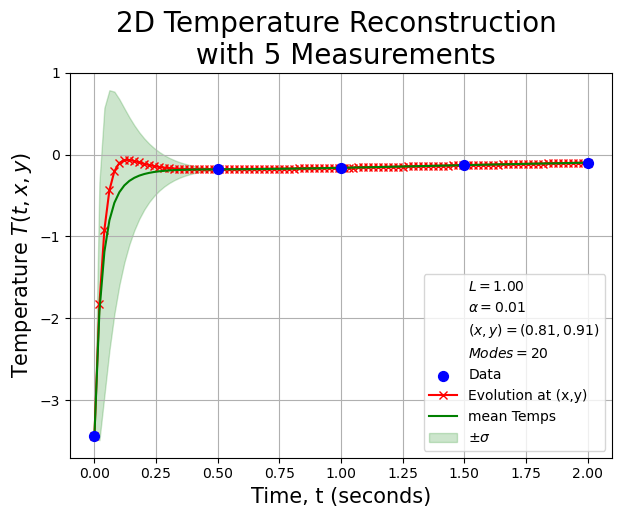

Temperature at t=2.00 for point (0.808, 0.909) is: -0.097080


In [35]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(1)

# --- Parameters ---
L = 1.0
alpha = 0.01
modes = 20
sigma = 0.01
tmax = 2
spatial_res = 100
num_pred_times = 100
num_meas = 5              

# Generate random Fourier coefficients
c_n, c_m = rng.uniform(-1, 1, modes), rng.uniform(-1, 1, modes)

# --- Define Grid Point to Track (using indices) ---
# measurements coordinates
x_plot = np.linspace(0, L, spatial_res)
y_plot = np.linspace(0, L, spatial_res)
x_idx = 80
y_idx = 90
x_coord = x_plot[x_idx]
y_coord = y_plot[y_idx]
x_meas = np.ones(num_meas) * x_coord
y_meas = np.ones(num_meas) * y_coord  
t_meas = np.linspace(0, tmax, num_meas)   
measurement_coords = [t_meas, x_meas, y_meas]

# prediction points
time_vals_pred = np.linspace(0, tmax, num_pred_times)
x_pred =  np.ones(num_pred_times) * x_coord
y_pred =  np.ones(num_pred_times) * y_coord
predictions_list = [time_vals_pred, x_pred, y_pred]

# Calculate true temperatures at the prediction points 
analytic_temps = temp_evolution_at_point(
    alpha, time_vals_pred, L, x_coord, y_coord, c_n, c_m
)

# calculate the measurements:
measured_temps = temp_evolution_at_point(
    alpha, t_meas, L, x_coord, y_coord, c_n, c_m
)

mean_predictions, variance_predictions, std_dev_predictions = GPR_prediction_2d(
    Length=L,
    alpha=alpha,
    modes=modes,
    prediction_coords=predictions_list,
    measurement_coords=measurement_coords,
    meas_temps=measured_temps,
    sigma=sigma,  
    kernel_matrix_2d_func=kernel_matrix_2d
)

# --- Plotting ---
plt.figure(figsize=(7, 5))
plt.plot([],[],color='none',label=rf"$L={L:.2f}$")
plt.plot([],[],color='none',label=rf"$\alpha={alpha:.2f}$")
plt.plot([],[],color='none',label=rf"$(x,y) = ({x_coord:.2f},{y_coord:.2f})$")
plt.plot([],[],color='none',label=rf"$Modes={modes}$")


plt.scatter(t_meas,measured_temps,color='blue', label='Data', zorder=5, s=50, marker='o')
plt.plot(time_vals_pred, analytic_temps, 'r-x', label=f'Evolution at (x,y)')
plt.plot(time_vals_pred, mean_predictions,color='g', label=f'mean Temps')
lower_bound = mean_predictions -  std_dev_predictions
upper_bound = mean_predictions +  std_dev_predictions
plt.fill_between(time_vals_pred, lower_bound, upper_bound, color='green', alpha=0.2, label=r'$\pm \sigma$')

plt.xlabel("Time, t (seconds)",size=15)
plt.ylabel(r"Temperature $T(t,x,y)$", size=15)
plt.title(f"2D Temperature Reconstruction \n with {num_meas} Measurements",size=20)
plt.legend()
plt.grid(True)
plt.show()

print(f"Temperature at t={time_vals_pred[-1]:.2f} for point ({x_coord:.3f}, {y_coord:.3f}) is: {analytic_temps[-1]:.6f}")